<a href="https://colab.research.google.com/github/nasif-raihan/Ml-and-DL-Codes/blob/main/Loan_prediction_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive

pd.__version__

'1.1.5'

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#data = pd.read_csv('loan_data.csv')
data = pd.read_csv('/content/drive/MyDrive/Datasets/loan_data.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.shape

(614, 13)

In [ ]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

1. Filling the missing values

In [ ]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)

#data.isnull().sum()

In [ ]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


2. Converting categories into numbers using map function.

In [ ]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Married'] = data['Married'].map({'No' : 0, 'Yes' : 1})
data['Dependents'] = data['Dependents'].map({'0' : 0, '1': 1, '2': 2, '3+': 3})
data['Education'] = data['Education'].map({'Not Graduate': 0, 'Graduate': 1})
data['Self_Employed'] = data['Self_Employed'].map({'No': 0, 'Yes': 1})
data['Property_Area'] = data['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
data['Loan_Status'] = data['Loan_Status'].map({'N': 0, 'Y': 1})

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


3.Bringing all the variables in the range 0 to 1

In [ ]:
for i in data.columns[1:]:
  data[i] = (data[i]-data[i].min())/(data[i].max()- data[i].min())

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [ ]:
data.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [ ]:
#saving the preprocessed data to a new csv file

data.to_csv('loan_prediction_data.csv', index=False)

In [ ]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
sklearn.__version__

'0.22.2.post1'

In [ ]:
data.shape

(614, 13)

In [ ]:
data.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.0,1.0,0.0,0.070489,0.0,0.19886,0.74359,1.0,1.0,1.0


In [ ]:
data = data.drop(columns='Loan_ID', axis=0) #axis = 1 hbe

In [ ]:
data.head(1), data.shape

(   Gender  Married  Dependents  ...  Credit_History  Property_Area  Loan_Status
 0     0.0      0.0         0.0  ...             1.0            1.0          1.0
 
 [1 rows x 12 columns], (614, 12))

4.Creating training and test variable

In [ ]:
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=data['Loan_Status'], random_state=10, test_size=0.2)

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((491, 11), (491,)), ((123, 11), (123,)))

5.Defining the architectural model

In [ ]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import InputLayer, Dense
 
keras.__version__, tf.__version__

('2.4.3', '2.4.1')

In [ ]:
input_neurons = X_train.shape[1]
output_neurons = 1      #as it's a binary classfication problem

input_neurons, output_neurons

(11, 1)

In [ ]:
#These are hyperparameter. We can tune these values by increasing or decreasing

no_hidden_layers = 2
no_neurons_layer_1 = 10
no_neurons_layer_2 = 5

ReLU is choosen as the activation function preliminarily and sigmoid in the final output (binary classification) here. Other activation function can also be chosen instead of these.

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape= (input_neurons,)))
model.add(Dense(units= no_neurons_layer_1, activation= 'relu'))
model.add(Dense(units= no_neurons_layer_2, activation= 'relu'))
model.add(Dense(units= output_neurons, activation= 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


6.Compiling the model (defining loss function, optimizer)

In [ ]:
model.compile(loss= 'binary_crossentropy', optimizer= 'Adam', metrics= ['accuracy'])

7.Training the model

In [ ]:
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs= 50)

Epoch 1/50
16/16 [==============================] - 1s 27ms/step - loss: 0.6566 - accuracy: 0.6424 - val_loss: 0.6397 - val_accuracy: 0.6911
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.6379 - accuracy: 0.6647 - val_loss: 0.6216 - val_accuracy: 0.6911
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6248 - accuracy: 0.6814 - val_loss: 0.6075 - val_accuracy: 0.6911
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6073 - accuracy: 0.6770 - val_loss: 0.5982 - val_accuracy: 0.6911
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5848 - accuracy: 0.7030 - val_loss: 0.5925 - val_accuracy: 0.6911
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5831 - accuracy: 0.6951 - val_loss: 0.5887 - val_accuracy: 0.6911
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5837 - accuracy: 0.6804 - val_loss: 0.5851 - val_accuracy: 0.6911
Epoch 8/50
16/16 [=

8.Evaluating model performance on validation set

In [ ]:
prediction = model.predict_classes(X_test)

accuracy_score(y_test, prediction)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.8130081300813008

9.Visualizing the model performance

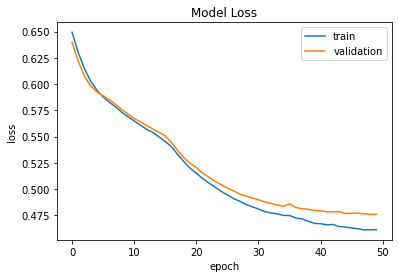

In [ ]:
#summarize history of loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

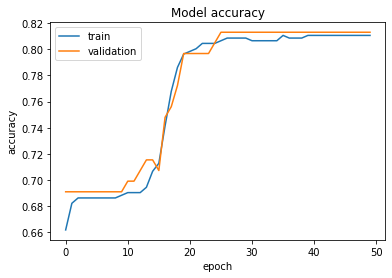

In [ ]:
# summarize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()